# YOLOv3 training for car detection

# **setup**

In [1]:
!nvidia-smi

Thu Sep 28 12:46:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
 148D90A9-4D3F-417C-BA7F-7C6B4AF95510.png
'16C85BD4-2DA8-4431-9E7F-A5A58510C99B (1).jpeg'
'16C85BD4-2DA8-4431-9E7F-A5A58510C99B (2).jpeg'
 16C85BD4-2DA8-4431-9E7F-A5A58510C99B.jpeg
'20210113 040909-1 (5).m4v'
'20210113 053524-1 (1).m4v'
'24,25 (1).mp4'
'24,25 (2).mp4'
 24,25.mp4
'26 part a.mp4'
 27D0AC78-EFCB-4AD8-9033-2A25CB7DDD1D.jpeg
 2A6B9909-1249-4594-811D-6315AB0826D4.jpeg
 30209303300202.pdf
'4th  industerial revolution worksheet.gdoc'
 5FF05868-9345-4B78-A526-D6613BF7B44F.jpeg
 7th-week-exam.gdoc
 7th-week-exam-solution.gdoc
 90342618-E280-4F6C-82D1-8585450C234E.jpeg
'Abba - Knowing me, knowing you with.mp3'
'ABBA - Voulez-Vous (Video).mp3'
'AC DC - Highway to Hell (Official Video).mp3'
 AEDDE175-548A-4A7D-B707-228BB43BA0A4.jpeg
'Ahmed Ahmed.pdf'
'AI Lec1-Intro. to computers& Impact on Our lives.gslides'
'Amira Abu-Elyazid Hassan.pdf'
 amld_data
'Android registration login issue 5.15.0 (18697) +20 1060806999'
'assignment 1.pdf'
'assignment 2 (1).pdf'


In [3]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15821, done.
remote: Counting objects: 100% (283/283), done.
remote: Compressing objects: 100% (185/185), done.
remote: Total 15821 (delta 149), reused 188 (delta 96), pack-reused 15538
Receiving objects: 100% (15821/15821), 14.71 MiB | 19.12 MiB/s, done.
Resolving deltas: 100% (10583/10583), done.


In [4]:
%cd darknet

/content/darknet


In [5]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!make

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: warning: unused variable ‘bu

In [6]:
!cp cfg/yolov3.cfg cfg/yolov3_training.cfg

In [7]:
!sed -i 's/batch=1/batch=64/' cfg/yolov3_training.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' cfg/yolov3_training.cfg
!sed -i 's/max batches = 500200/max batches = 4800/' cfg/yolov3_training.cfg
!sed -i '610 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '696 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '783 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '603 s@filters=255@filters=18@' cfg/yolov3_training.cfg
!sed -i '689 s@filters=255@filters=18@ ' cfg/yolov3_training.cfg
!sed -i '776 s@filters=255@filters=18@' cfg/yolov3_training.cfg

In [8]:
!mkdir /mydrive/yolov3

mkdir: cannot create directory ‘/mydrive/yolov3’: File exists


In [9]:
!echo "car" > data/obj.names

In [10]:
!echo -e 'classes= 1\ntrain = data/train.txt\nvalid= data/test.txt \nnames = data/obj.names \nbackup = /mydrive/yolov3' > data/obj.data
!mkdir data/obj

In [11]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2023-09-28 12:48:34--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  63.9MB/s    in 2.4s    

2023-09-28 12:48:37 (63.9 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [12]:
!unzip /mydrive/yolov3/cars.zip -d data/obj

Archive:  /mydrive/yolov3/cars.zip
 extracting: data/obj/_darknet.labels  
  inflating: data/obj/vid_4_1000_jpg.rf.6649c84fe9fbc1f61804f537e8d69b42.jpg  
  inflating: data/obj/vid_4_1000_jpg.rf.6649c84fe9fbc1f61804f537e8d69b42.txt  
  inflating: data/obj/vid_4_10000_jpg.rf.6910c95311a8681ef518c63b04f04df6.jpg  
  inflating: data/obj/vid_4_10000_jpg.rf.6910c95311a8681ef518c63b04f04df6.txt  
  inflating: data/obj/vid_4_10020_jpg.rf.2328eb988a907f003df130d162016149.jpg  
  inflating: data/obj/vid_4_10020_jpg.rf.2328eb988a907f003df130d162016149.txt  
  inflating: data/obj/vid_4_10040_jpg.rf.c8452ea03dfdb09bf628593f57834311.jpg  
  inflating: data/obj/vid_4_10040_jpg.rf.c8452ea03dfdb09bf628593f57834311.txt  
  inflating: data/obj/vid_4_10060_jpg.rf.9382b4cb230af5f4280bb9264c6fa4f7.jpg  
  inflating: data/obj/vid_4_10060_jpg.rf.9382b4cb230af5f4280bb9264c6fa4f7.txt  
  inflating: data/obj/vid_4_10080_jpg.rf.78c97c284fc72545a0af95edaaaf7049.jpg  
 extracting: data/obj/vid_4_10080_jpg.rf.78c97c

In [13]:
import glob
imgs=glob.glob("data/obj/*.jpg")
print(imgs)

['data/obj/vid_4_720_jpg.rf.3dbe13f0638f984f26c0e2a22fdb712b.jpg', 'data/obj/vid_4_16940_jpg.rf.46b364cd5b23d7c26ef43ff9428a58b2.jpg', 'data/obj/vid_4_23420_jpg.rf.a5c0b9657b57554e342cf8a6647b10f5.jpg', 'data/obj/vid_4_10760_jpg.rf.1095d6d3d977a88c0c62aa8dc5229d67.jpg', 'data/obj/vid_4_6180_jpg.rf.db2140c1767ea3362801ce9c69f8ed05.jpg', 'data/obj/vid_4_10120_jpg.rf.1eb67454e43cb6ddc2cc3f4b1f82d6c8.jpg', 'data/obj/vid_4_10060_jpg.rf.9382b4cb230af5f4280bb9264c6fa4f7.jpg', 'data/obj/vid_4_14340_jpg.rf.1a9a5eb45435e32dfaf768301fb03c9e.jpg', 'data/obj/vid_4_19500_jpg.rf.db7186a8347a4680df67a0bb1dde0cb2.jpg', 'data/obj/vid_4_28840_jpg.rf.f4f72eb28cf34195560b9f8930045e47.jpg', 'data/obj/vid_4_22360_jpg.rf.859175182d5acc95662361ffbc9819d8.jpg', 'data/obj/vid_4_24820_jpg.rf.92584f4288067bdcc459abcd3f48023f.jpg', 'data/obj/vid_4_4100_jpg.rf.da3557104f6fa9a0995068128969bf50.jpg', 'data/obj/vid_4_3400_jpg.rf.03a0db215e0ea5f70df31c3cf46175d1.jpg', 'data/obj/vid_4_22400_jpg.rf.d4bbab11f808acafe0fa644

In [14]:
file=open("data/train.txt",'w')
file.write('\n'.join(imgs))

64614

In [15]:
file.close()

In [16]:
!pwd

/content/darknet


In [17]:
!ls

3rdparty		darknet_video.py       net_cam_v4.sh
backup			data		       obj
build			docker-compose.yml     package.xml
build.ps1		Dockerfile.cpu	       README.md
cfg			Dockerfile.gpu	       results
cmake			image_yolov3.sh        scripts
CMakeLists.txt		image_yolov4.sh        src
darknet			include		       vcpkg.json
darknet53.conv.74	json_mjpeg_streams.sh  vcpkg.json.opencv23
DarknetConfig.cmake.in	LICENSE		       video_yolov3.sh
darknet_images.py	Makefile	       video_yolov4.sh
darknet.py		net_cam_v3.sh


# *training*

In [25]:
!./darknet detector train data/obj.data cfg/yolov3_training.cfg /content/gdrive/MyDrive/yolov3/yolov3_training_last.weights -dont_show

Streaming output truncated to the last 5000 lines.
 total_bbox = 5392, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.000023, iou_loss = 0.000000, total_loss = 0.000023 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.813778), count: 2, class_loss = 0.064684, iou_loss = 0.061146, total_loss = 0.125831 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.865685), count: 1, class_loss = 0.005232, iou_loss = 0.017486, total_loss = 0.022718 
 total_bbox = 5395, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.829791), count: 1, class_loss = 0.243719, iou_loss = 0.014535, total_loss = 0.258254 
v3 (mse lo

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_training.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.381857), count: 2, class_loss = 0.414911, iou_loss = 0.910134, total_loss = 1.325045 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.353309), count: 5, class_loss = 1.432327, iou_loss = 1.852124, total_loss = 3.284451 
 total_bbox = 17641, rewritten_bbox = 0.022674 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.000400, iou_loss = 0.000000, total_loss = 0.000400 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000539, iou_loss = 0.000000, total_loss = 0.000539 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.289236), count: 3, class_loss = 0.923128, iou_loss = 2.279214, total_loss = 3.202341 
 total_bbox = 17644, rewritten_bbox = 0.022671 % 
454/500

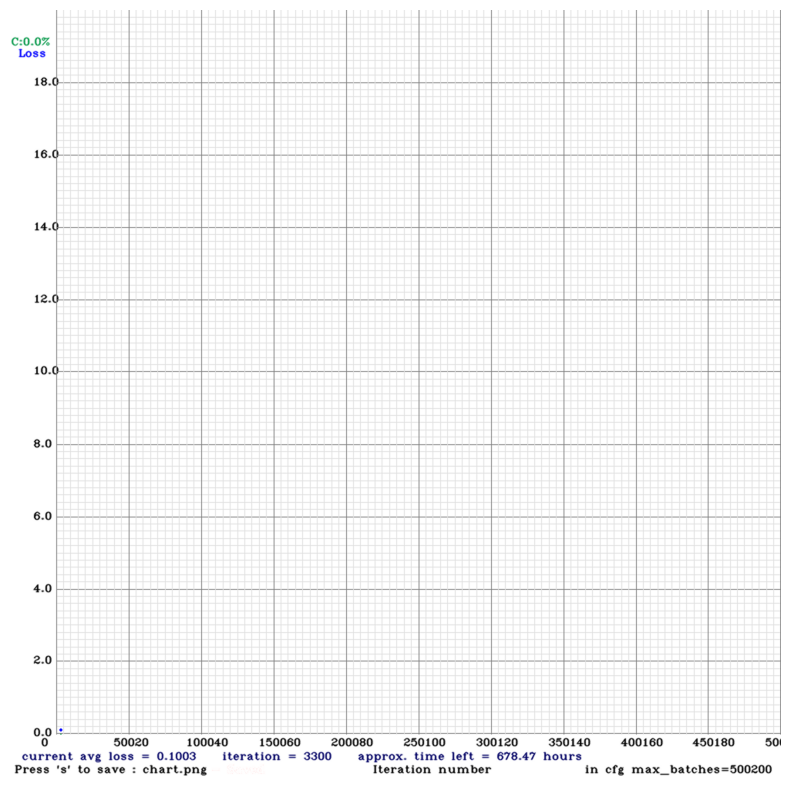

In [26]:
imShow('chart.png')

# **testing**

 CUDA-version: 11080 (12000), cuDNN: 8.9.0, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

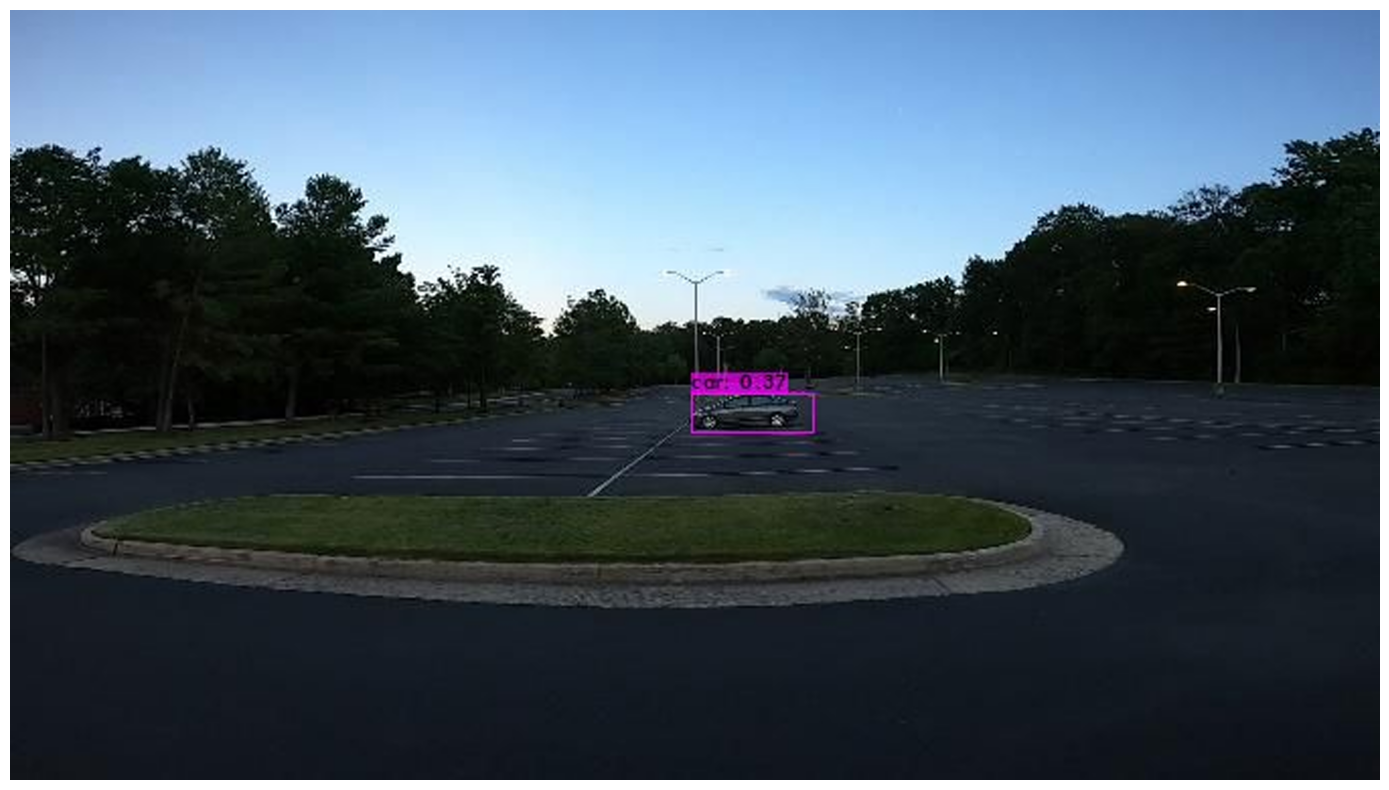

In [27]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_training.cfg /mydrive/yolov3/yolov3_training_last.weights /mydrive/yolov3/test.jpg -thresh 0.3
imShow('predictions.jpg')

In [21]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  #%matplotlib inline when using jupyter notebook

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
